In [1]:
import uproot
import numpy as np
import pandas
import matplotlib.pyplot as plt
%matplotlib inline
f = uproot.open('FASERnu1-skim-3202.root')
g = uproot.open('FASERnu1-skim-51.root')

In [3]:
sigxlist = f["ntuple"]["x"].array().tolist()
print("x")
sigylist = f["ntuple"]["y"].array().tolist()
print("y")
sigzlist = f["ntuple"]["z"].array().tolist()
print("z")
sigpxlist = f["ntuple"]["px"].array().tolist()
print("px")
sigpylist = f["ntuple"]["py"].array().tolist()
print("py")
sigpzlist = f["ntuple"]["pz"].array().tolist()
print("pz")
bgxlist = g["ntuple"]["x"].array().tolist()
print("x")
bgylist = g["ntuple"]["y"].array().tolist()
print("y")
bgzlist = g["ntuple"]["z"].array().tolist()
print("z")
bgpxlist = g["ntuple"]["px"].array().tolist()
print("px")
bgpylist = g["ntuple"]["py"].array().tolist()
print("py")
bgpzlist = g["ntuple"]["pz"].array().tolist()
print("pz")

x
y
z
px
py
pz
x
y
z
px
py
pz


In [4]:
list_signtuples = list(zip(sigxlist,sigylist,sigzlist,sigpxlist,sigpylist,sigpzlist))
list_bgntuples = list(zip(bgxlist,bgylist,bgzlist,bgpxlist,bgpylist,bgpzlist))

In [5]:
import pandas
csig = pandas.DataFrame(list_signtuples,columns=['x','y','z','px','py','pz']) #DataFrame of raw signal variables
cbkg = pandas.DataFrame(list_bgntuples,columns=['x','y','z','px','py','pz']) #DataFrame of raw background variables

In [6]:
def buildEs(c):
    #build basic variable
    c["p"]=np.sqrt(c["px"]**2+c["py"]**2+c["pz"]**2)
    c["pT"]=np.sqrt(c["px"]**2+c["py"]**2)
    c["r"]=np.sqrt(c["x"]**2+c["y"]**2+c["z"]**2)
    c["rho"]=np.sqrt(c["x"]**2+c["y"]**2)
    c["thetax"]=np.arctan(c["px"]/c["pz"])
    c["thetay"]=np.arctan(c["py"]/c["pz"])
    c["trackangle"] = np.arctan(c["pT"]/np.abs(c["pz"]))
    c["dz"] = c["z"] + 696.5
    c["ip"] = np.sqrt((c["x"]-c["dz"]*c["px"]/c["pz"])**2+(c["y"]-c["dz"]*c["py"]/c["pz"])**2)
    c["alpha"] = np.arctan(np.sqrt(c["x"]**2+c["y"]**2)/(c["dz"]))
buildEs(csig)
buildEs(cbkg)

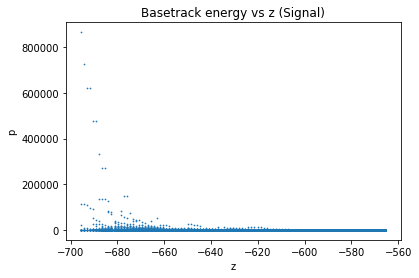

In [108]:
csig.plot.scatter(x="z",y="p",title="Basetrack energy vs z (Signal)",s=0.5)

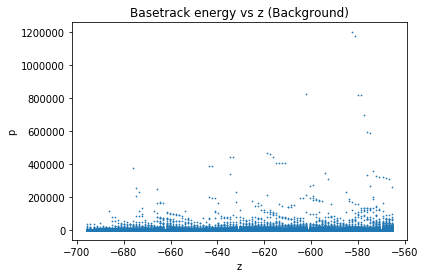

In [32]:
cbkg.plot.scatter(x="z",y="p",title="Basetrack energy vs z (Background)",s=0.5)

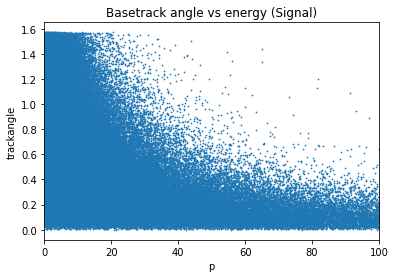

In [41]:
csig.plot.scatter(x="p",y="trackangle",title="Basetrack angle vs energy (Signal)",xlim=[0,100],s=0.5)

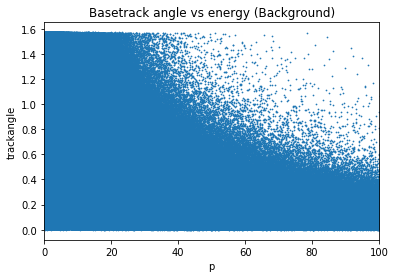

In [42]:
cbkg.plot.scatter(x="p",y="trackangle",title="Basetrack angle vs energy (Background)",xlim=[0,100],s=0.5)

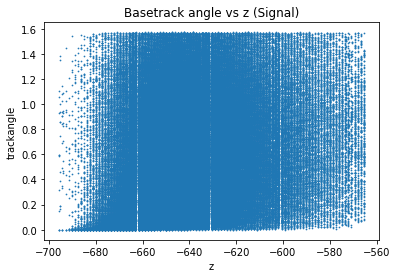

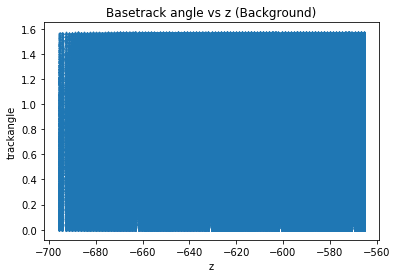

In [111]:
csig.plot.scatter(x="z",y="trackangle",title="Basetrack angle vs z (Signal)",s=0.5)
cbkg.plot.scatter(x="z",y="trackangle",title="Basetrack angle vs z (Background)",s=0.5)

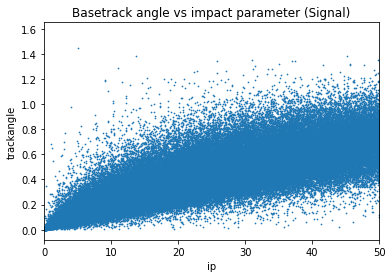

In [120]:
csig.plot.scatter(x="ip",y="trackangle",title="Basetrack angle vs impact parameter (Signal)",xlim=[0,50],s=0.5)
#cbkg.plot.scatter(x="z",y="trackangle",title="Basetrack angle vs z (Background)",s=0.5)

In [7]:
csigcut1 = csig[np.logical_and(csig["p"]<1000,csig["p"]>40)]
cbkgcut1 = cbkg[np.logical_and(cbkg["p"]<1000,cbkg["p"]>40)]

In [8]:
ecutlistsig = csigcut1["p"].to_numpy().tolist()
ecutlistbkg = cbkgcut1["p"].to_numpy().tolist()
ipcutlistsig = csigcut1["ip"].to_numpy().tolist()
ipcutlistbkg = cbkgcut1["ip"].to_numpy().tolist()
alphacutlistsig = csigcut1["alpha"].to_numpy().tolist()
alphacutlistbkg = cbkgcut1["alpha"].to_numpy().tolist()
deltathetacutlistsig = csigcut1["trackangle"].to_numpy().tolist()
deltathetacutlistbkg = cbkgcut1["trackangle"].to_numpy().tolist()

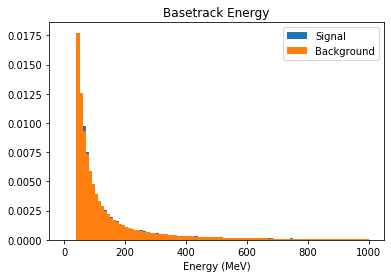

In [171]:
plt.hist(ecutlistsig,range=[0,1000],bins=100,density=1,label="Signal")
plt.hist(ecutlistbkg,range=[0,1000],bins=100,density=1,label="Background")
plt.title("Basetrack Energy")
plt.xlabel("Energy (MeV)")
plt.legend()

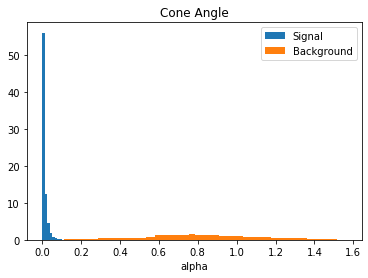

In [179]:
plt.hist(alphacutlistsig,bins=100,density=1,label="Signal")
plt.hist(alphacutlistbkg,bins=100,density=1,label="Background")
plt.title("Cone Angle")
plt.xlabel("alpha")
plt.legend()

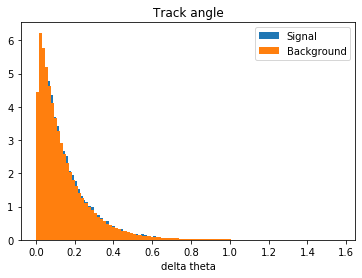

In [10]:
plt.hist(deltathetacutlistsig,bins=100,density=1,label="Signal")
plt.hist(deltathetacutlistbkg,bins=100,density=1,label="Background")
plt.title("Track angle")
plt.xlabel("delta theta")
plt.legend()

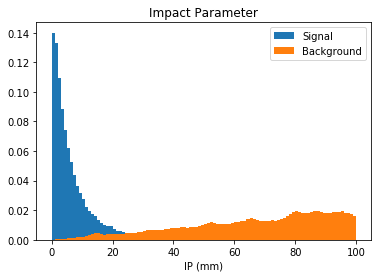

In [11]:
plt.hist(ipcutlistsig,bins=100,range=[0,100],density=1,label="Signal")
plt.hist(ipcutlistbkg,bins=100,range=[0,100],density=1,label="Background")
plt.title("Impact Parameter")
plt.xlabel("IP (mm)")
plt.legend()

In [13]:
csigcut2 = csigcut1[csigcut1["alpha"]<0.1]
cbkgcut2 = cbkgcut1[cbkgcut1["alpha"]<0.1]
ecut2listsig = csigcut2["p"].to_numpy().tolist()
ecut2listbkg = cbkgcut2["p"].to_numpy().tolist()
ipcut2listsig = csigcut2["ip"].to_numpy().tolist()
ipcut2listbkg = cbkgcut2["ip"].to_numpy().tolist()
alphacut2listsig = csigcut2["alpha"].to_numpy().tolist()
alphacut2listbkg = cbkgcut2["alpha"].to_numpy().tolist()
deltathetacut2listsig = csigcut2["trackangle"].to_numpy().tolist()
deltathetacut2listbkg = cbkgcut2["trackangle"].to_numpy().tolist()

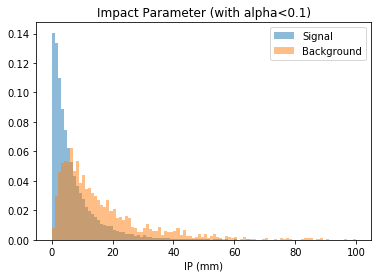

In [16]:
plt.hist(ipcut2listsig,bins=100,range=[0,100],density=1,alpha=0.5,label="Signal")
plt.hist(ipcut2listbkg,bins=100,range=[0,100],density=1,alpha=0.5,label="Background")
plt.title("Impact Parameter (with alpha<0.1)")
plt.xlabel("IP (mm)")
plt.legend()

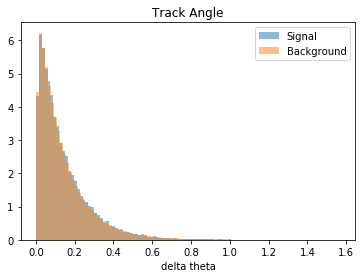

In [19]:
plt.hist(deltathetacutlistsig,bins=100,density=1,alpha=0.5,label="Signal")
plt.hist(deltathetacutlistbkg,bins=100,density=1,alpha=0.5,label="Background")
plt.title("Track Angle")
plt.xlabel("delta theta")
plt.legend()

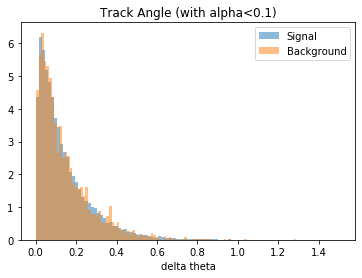

In [18]:
plt.hist(deltathetacut2listsig,bins=100,density=1,alpha=0.5,label="Signal")
plt.hist(deltathetacut2listbkg,bins=100,density=1,alpha=0.5,label="Background")
plt.title("Track Angle (with alpha<0.1)")
plt.xlabel("delta theta")
plt.legend()

In [20]:
csigcut3 = csigcut2[csigcut2["ip"]<20]
cbkgcut3 = cbkgcut2[cbkgcut2["ip"]<20]
ecut3listsig = csigcut3["p"].to_numpy().tolist()
ecut3listbkg = cbkgcut3["p"].to_numpy().tolist()
ipcut3listsig = csigcut3["ip"].to_numpy().tolist()
ipcut3listbkg = cbkgcut3["ip"].to_numpy().tolist()
alphacut3listsig = csigcut3["alpha"].to_numpy().tolist()
alphacut3listbkg = cbkgcut3["alpha"].to_numpy().tolist()
deltathetacut3listsig = csigcut3["trackangle"].to_numpy().tolist()
deltathetacut3listbkg = cbkgcut3["trackangle"].to_numpy().tolist()

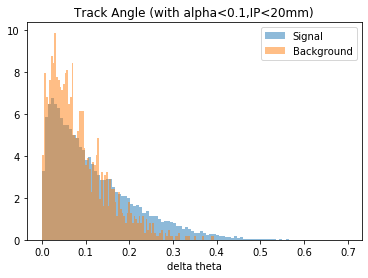

In [21]:
plt.hist(deltathetacut3listsig,bins=100,density=1,alpha=0.5,label="Signal")
plt.hist(deltathetacut3listbkg,bins=100,density=1,alpha=0.5,label="Background")
plt.title("Track Angle (with alpha<0.1,IP<20mm)")
plt.xlabel("delta theta")
plt.legend()

In [30]:
print(len(ecut3listbkg))

1568
